In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [117]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head(7)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df.shape

(42000, 785)

In [119]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38250,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


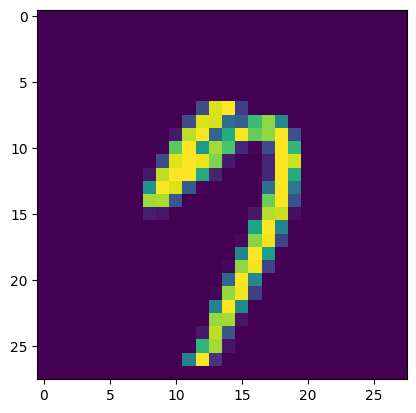

In [120]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[33385, 1:].values.reshape(28,28))

In [121]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [123]:
X_train.shape

(33600, 784)

In [124]:
X_test.shape

(8400, 784)

In [125]:
#Using K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [126]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [127]:
import time
start = time.time()
y_pred = model.predict(X_test)
print(time.time()-start)

15.343137979507446


In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [130]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
#Principle Component Analysis

from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [132]:
X_train_tranf= pca.fit_transform(X_train) 
X_test_tranf = pca.transform(X_test)

In [133]:
X_train.shape

(33600, 784)

In [134]:
X_train_tranf.shape

(33600, 200)

In [135]:
model = KNeighborsClassifier()
model.fit(X_train_tranf, y_train)

KNeighborsClassifier()

In [136]:
y_pred = model.predict(X_test_tranf)

In [137]:
accuracy_score(y_test, y_pred)

0.9502380952380952

In [145]:
for i in range(1,40):
    pca = PCA(n_components = i)
    X_train_tranf= pca.fit_transform(X_train) 
    X_test_tranf = pca.transform(X_test)
    
    model = KNeighborsClassifier()
    model.fit(X_train_tranf, y_train)
    
    y_pred = model.predict(X_test_tranf)
    
    print(accuracy_score(y_test, y_pred))


0.25976190476190475
0.32404761904761903
0.5104761904761905
0.666547619047619
0.7376190476190476
0.8227380952380953
0.8436904761904762
0.8720238095238095
0.886547619047619
0.9057142857142857
0.9113095238095238
0.9180952380952381
0.925952380952381
0.9354761904761905
0.9384523809523809
0.9382142857142857
0.9402380952380952
0.9394047619047619
0.9429761904761905
0.9436904761904762
0.9436904761904762
0.9439285714285715
0.9448809523809524
0.9453571428571429
0.9485714285714286
0.9479761904761905
0.9483333333333334
0.9486904761904762
0.9480952380952381
0.9501190476190476
0.9503571428571429
0.9515476190476191
0.9492857142857143
0.950595238095238
0.9510714285714286
0.9504761904761905
0.9522619047619048
0.9516666666666667
0.9534523809523809


#  **Data Visualization**

In [139]:
#Transforming to a 2D co-ordinate system
pca = PCA(n_components = 2)
X_train_tranf= pca.fit_transform(X_train) 
X_test_tranf = pca.transform(X_test)

In [140]:
X_train_tranf

array([[-2.71869171, -0.49011483],
       [-0.67678187, -6.75251448],
       [-3.03320408,  6.50991827],
       ...,
       [ 2.14914094,  0.78148481],
       [ 1.05948619,  0.94701446],
       [17.70263656,  1.96236817]])

In [147]:
import plotly.express as px
y_train_tranf = y_train.astype(str)
fig = px.scatter(x= X_train_tranf[:,0],
                 y= X_train_tranf[:,1],
                 color = y_train_tranf,
                 color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()

In [151]:
#Transforming to a 3D co-ordinate system
pca = PCA(n_components = 3)
X_train_tranf= pca.fit_transform(X_train) 
X_test_tranf = pca.transform(X_test)

In [143]:
X_train_tranf

array([[-2.7186308 , -0.48962447,  1.13526442],
       [-0.67696912, -6.75291976, -2.33660174],
       [-3.03319991,  6.50930951,  7.4915455 ],
       ...,
       [ 2.14883233,  0.78089765, -0.74770836],
       [ 1.05953654,  0.94761969,  3.95018022],
       [17.70257512,  1.96173661, -4.94345481]])

In [148]:
y_train_tranf = y_train.astype(str)
fig = px.scatter_3d(df, x= X_train_tranf[:,0],
                 y= X_train_tranf[:,1],
                 z= X_train_tranf[:,2],
                 color = y_train_tranf)
fig.update_layout(margin = dict(l= 20, r= 20, t= 20, b= 20))
fig.show()

In [152]:
#Eigen values
pca.explained_variance_

array([40.67111198, 29.17023397, 26.74459615])

In [153]:
#Eigen vectors
pca.components_.shape

(3, 784)

In [154]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [155]:
pca = PCA(n_components = None)
X_train_tranf= pca.fit_transform(X_train) 
X_test_tranf = pca.transform(X_test)

In [156]:
pca.explained_variance_.shape

(784,)

In [157]:
pca.components_

array([[-1.50074992e-19,  2.77555756e-17,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20, -1.38777878e-17, -1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20, -1.38777878e-17, -4.16333634e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00,  6.77518817e-03,  7.97715344e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  1.81666233e-01,  1.25121896e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -2.74532268e-02,  9.16883896e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [159]:
pca.components_.shape

(784, 784)

In [160]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [161]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

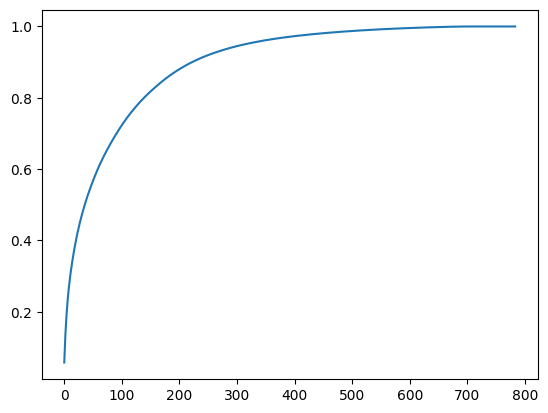

In [162]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))